<a href="https://colab.research.google.com/github/Mohamedyasser2002/Machine-Learning/blob/main/heartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv(r'/content/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.shape

(918, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

<Axes: >

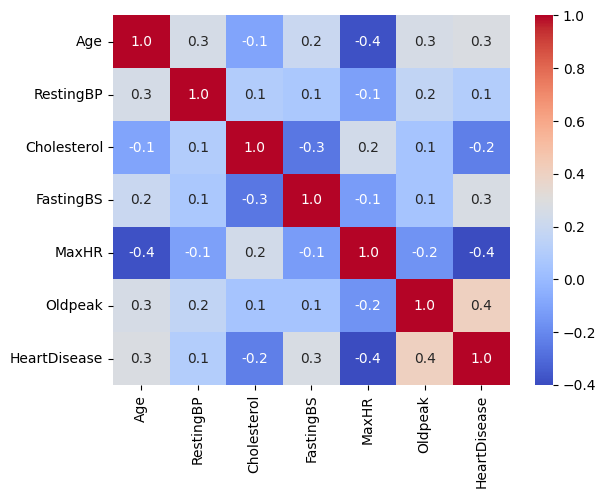

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap = "coolwarm",fmt = ".1f",cbar = True)

<function matplotlib.pyplot.show(close=None, block=None)>

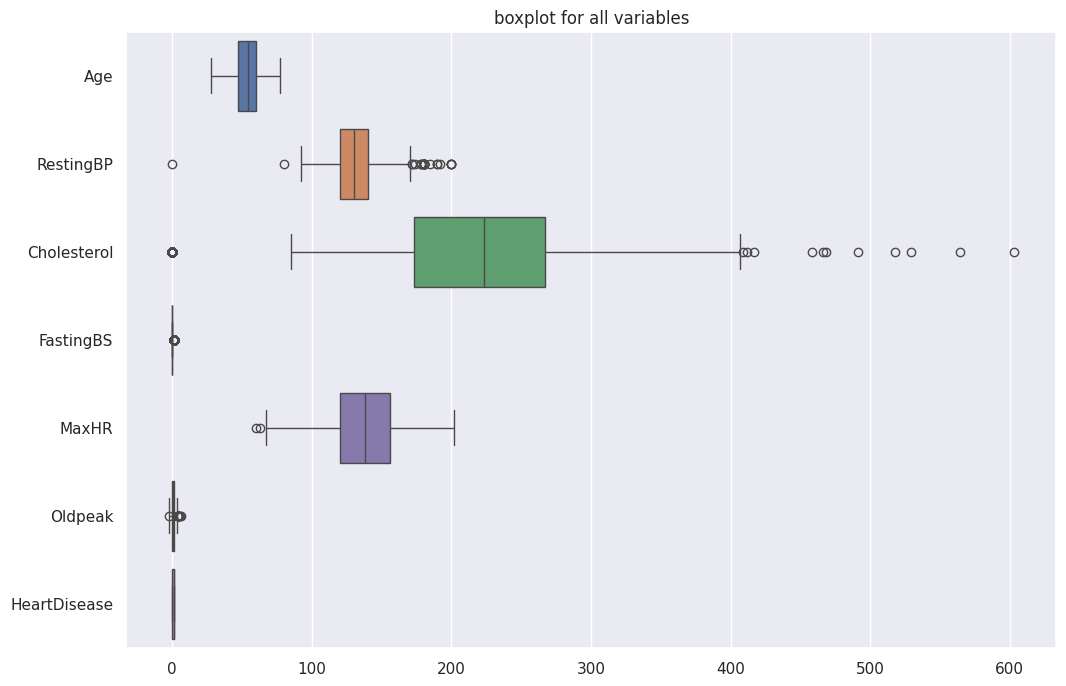

In [ ]:
plt.figure(figsize=(12,8))
sns.set(style='darkgrid')
sns.boxplot(data=df,orient='h')
plt.title("boxplot for all variables")
plt.show

In [ ]:
outliers = df.columns
for i in outliers:
  if df[i].dtype in ["int64", "float64"]:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

In [ ]:
df.shape

(587, 12)

In [ ]:
object_columns = df.select_dtypes(include = ["object"]).columns
print(object_columns)

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [ ]:
df["Sex"] = df["Sex"].replace({"M": 0, "F": 1}).astype('int64')

In [ ]:
df = pd.get_dummies(df, columns = object_columns, drop_first = True).astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 587 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                587 non-null    int64
 1   RestingBP          587 non-null    int64
 2   Cholesterol        587 non-null    int64
 3   FastingBS          587 non-null    int64
 4   MaxHR              587 non-null    int64
 5   Oldpeak            587 non-null    int64
 6   HeartDisease       587 non-null    int64
 7   Sex_1              587 non-null    int64
 8   ChestPainType_ATA  587 non-null    int64
 9   ChestPainType_NAP  587 non-null    int64
 10  ChestPainType_TA   587 non-null    int64
 11  RestingECG_Normal  587 non-null    int64
 12  RestingECG_ST      587 non-null    int64
 13  ExerciseAngina_Y   587 non-null    int64
 14  ST_Slope_Flat      587 non-null    int64
 15  ST_Slope_Up        587 non-null    int64
dtypes: int64(16)
memory usage: 78.0 KB


In [ ]:
x = df.drop(["HeartDisease"],axis=1)

y = df['HeartDisease']


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:

print(x_train.shape)

print(x_test.shape)


(440, 15)
(147, 15)


# Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
y_pred_knn = knn.predict(x_test)

In [ ]:
print(y_pred_knn)

[0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1
 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1
 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0
 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1]


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score ,recall_score ,f1_score
print(confusion_matrix(y_pred_knn,y_test))
print(accuracy_score(y_pred_knn,y_test))
print(precision_score(y_pred_knn,y_test))
print(recall_score(y_pred_knn,y_test))
print(f1_score(y_pred_knn,y_test))

[[75 14]
 [10 48]]
0.8367346938775511
0.7741935483870968
0.8275862068965517
0.7999999999999999


# SVM

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', degree=5, C=0.1, gamma=0.1)
svc.fit(x_train, y_train)


SVC(C=0.1, degree=5, gamma=0.1)

In [ ]:
y_pred_svc = svc.predict(x_test)

In [ ]:
print(y_pred_svc)

[0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1
 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0
 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1]


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score ,recall_score ,f1_score
print(confusion_matrix(y_pred_svc,y_test))
print(accuracy_score(y_pred_svc,y_test))
print(precision_score(y_pred_svc,y_test))
print(recall_score(y_pred_svc,y_test))
print(f1_score(y_pred_svc,y_test))

[[82 18]
 [ 3 44]]
0.8571428571428571
0.7096774193548387
0.9361702127659575
0.8073394495412844


# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred=lg.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0
 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1]


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score ,recall_score ,f1_score
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(precision_score(y_pred,y_test))
print(recall_score(y_pred,y_test))
print(f1_score(y_pred,y_test))

[[77 16]
 [ 8 46]]
0.8367346938775511
0.7419354838709677
0.8518518518518519
0.7931034482758621


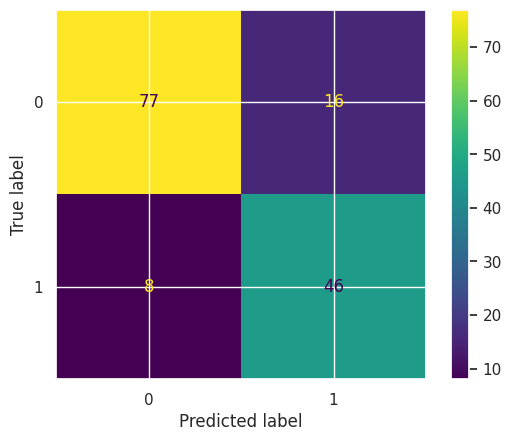

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_pred,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lg.classes_)
disp.plot()
plt.show()

In [ ]:
#-----------------------------------------------------------------#

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(32,activation='relu',input_shape=(x_train.shape[1],)))

model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                512       
                                                                 
 dense_11 (Dense)            (None, 64)                2112      
                                                                 
 dense_12 (Dense)            (None, 128)               8320      
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 11073 (43.25 KB)
Trainable params: 11073 (43.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam
opt=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.99)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,validation_split=0.1,batch_size=32,epochs=15)

Epoch 1/15
13/13 [==============================] - 6s 131ms/step - loss: 0.6184 - accuracy: 0.6944 - val_loss: 0.5391 - val_accuracy: 0.7500
Epoch 2/15
13/13 [==============================] - 0s 24ms/step - loss: 0.4582 - accuracy: 0.8460 - val_loss: 0.4579 - val_accuracy: 0.7727
Epoch 3/15
13/13 [==============================] - 0s 25ms/step - loss: 0.3623 - accuracy: 0.8535 - val_loss: 0.4493 - val_accuracy: 0.8182
Epoch 4/15
13/13 [==============================] - 0s 32ms/step - loss: 0.3339 - accuracy: 0.8586 - val_loss: 0.4717 - val_accuracy: 0.7955
Epoch 5/15
13/13 [==============================] - 1s 43ms/step - loss: 0.3168 - accuracy: 0.8636 - val_loss: 0.4668 - val_accuracy: 0.7955
Epoch 6/15
13/13 [==============================] - 0s 31ms/step - loss: 0.2998 - accuracy: 0.8838 - val_loss: 0.4621 - val_accuracy: 0.7955
Epoch 7/15
13/13 [==============================] - 1s 45ms/step - loss: 0.2886 - accuracy: 0.8889 - val_loss: 0.4532 - val_accuracy: 0.7955
Epoch 8/15
1

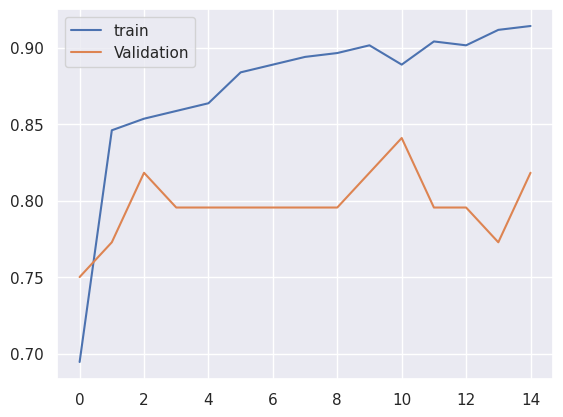

In [ ]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend()
plt.show()

In [ ]:
y_pred=model.predict(x_test)

5/5 [==============================] - 0s 4ms/step


In [ ]:
y_p=[]
for i in y_pred:
    if i >0.5:
        y_p.append(1)
    else:
        y_p.append(0)

In [ ]:
model.evaluate(x_test,y_test)[1]

5/5 [==============================] - 0s 5ms/step - loss: 0.3707 - accuracy: 0.8571


0.8571428656578064